In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [4]:
# 显示图像
def img_show(img):
    if len(img.shape) == 3:
        if img.shape[-1]==3:
            b,g,r = cv2.split(img)
            img = cv2.merge([r,g,b])
        elif img.shape[-1]==4:
            b,g,r,a = cv2.split(img)
            img = img
        plt.imshow(img)
    elif len(img.shape) == 2:
        plt.imshow(img,cmap="gray")

In [5]:
# 随机加椒盐函数
def salt(img,n):
    # 循环添加n个椒盐
    for k in range(n):
        # 随机添加椒盐的坐标
        i = int(np.random.random()*img.shape[0])
        j = int(np.random.random()*img.shape[1])
        # 若位灰度图
        img[i,j] = 255
        # 若为RGB图
        img[i,j,0] = 255
        img[i,j,0] = 255
        img[i,j,0] = 255
    return img

In [6]:
# 清洗锐化图片
def cleaning(img):
    bgr = cv2.split(img)
    bgrNew = []
    for c in bgr:
        c = cv2.threshold(c,127,255,cv2.THRESH_BINARY)
        bgrNew.append(c[1])
    img = cv2.merge(bgrNew)
    return img

hand = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/hand.png")
cleaning(hand)
cv2.imwrite("/Users/tanjun/Desktop/tanjun/opencv/hand.png",hand)

True

# 22.1 理论基础

In [7]:
# 当我们预测的是一个离散值时，做的工作是分类
# 当我们预测的是一个连续值是，做的工作是回归
# 当我们将训练集中的数据分成若干组时，做的工作是聚类

# 聚类不需要标签，它根据现有数据集自动完成分类，属于无监督学习

### 22.1.2 K均值聚类的基本步骤

In [8]:
# 1.随机选取k个点作为分类的中心点
# 2.将每个数据点放到距离它最近的中心点所在的类中
# 3.重新计算各个分类数据点的平均值，将该平均值作为新的分类中心点
# 4.重复步骤2和3，直到分类稳定

### 22.1.3 K均值聚类模块

In [9]:
# retval,bestLabels,centers = cv2.kmeans(data,K,bestLabels,criteria,attempts,flags)
# data：输入数据，np.float32类型，每个特征放在单独一列中
# K：要分出的簇的个数，即分类数目。最常见的是k=2,即二分类
# bestLabels：计算后各个数据点的最终分类标签（索引）。实际使用中，设置为None
# criteria：算法迭代的终止条件。当达到最大循环次数或指定的精度阈值时停止。
# 该参数由3个参数构成（type，max_iter，eps）：
# type：终止的类型：
# cv2.TERM_CRITERIA_EPS       精度满足eps时停止
# cv2.TERM_CRITERIA_MAX_ITER  迭代次数超过max_iter时停止
# TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER  上述条件中任意一个满足就停止
# max_iter：最大迭代次数
# eps：精确度的阈值
# attempts：具体实现时，为获取最佳效果，可能对不同初始分类值进行多次尝试，指定attempts值，可让算法使用不同初始值进行多次尝试
# flags：选择中心点的方法，主要有3种：
# cv2.KMEANS_RANDOM_CENTERS：随机选取中心点
# cv2.KMEANS_PP_CENTERS：基于中心化算法选取中心点
# cv2.KMEANS_USE_INITIAL_LABELS：使用用户输入数据作为第一次分类中心点，若要多次尝试，后续是随机或伴随机设置中心点
# 返回值：
# retval：距离值，返回每心点到相应中心点距离的平方和
# bestLabels：各个数据的最终分类标签（索引）
# centers：每个分类的中心点数据

# 22.3 简单示例

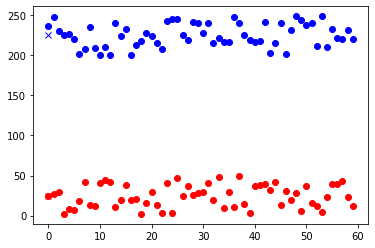

In [12]:
# 随机生成一组数据，使用函数cv2.kmeans()对其分类

xiaoMI = np.random.randint(0,50,60)
daMI = np.random.randint(200,250,60)

# 1.数据预处理
MI = np.hstack((xiaoMI,daMI))
MI = MI.reshape((120,1))
MI = np.float32(MI)

# 设置参数
criteria = (cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER,10,1.0)
flags = cv2.KMEANS_RANDOM_CENTERS

# 调用函数cv2.kmeans()
retval,bestLabels,centers = cv2.kmeans(MI,2,None,criteria,10,flags)

# 分类
XM = MI[bestLabels==0]
DM = MI[bestLabels==1]

# 显示
plt.plot(XM,'ro')
plt.plot(DM,'bo')
plt.plot(centers[0],'rx')
plt.plot(centers[1],'bx')
plt.show()

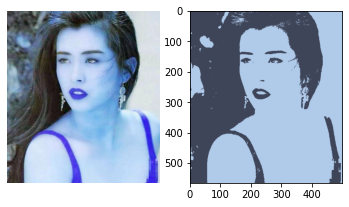

In [14]:
# 使用函数cv2.kmeans()可以将灰度图像处理为二值图像
# 1.图像预处理
wzx = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/wzx.jpg")
data = wzx.reshape((-1,3))
data = np.float32(data)

# 2.参数设置
criteria = (cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER,10,1.0)
flags = cv2.KMEANS_RANDOM_CENTERS
K = 2

# 3.调用函数cv2.kmeans()
ret,label,center = cv2.kmeans(data,K,None,criteria,10,flags)

# 4.值替换
center = np.uint8(center)
res1 = center[label.flatten()]
res2 = res1.reshape((wzx.shape))

# 5.显示变换前后的图像
plt.subplot(121)
plt.imshow(wzx)
plt.axis("off")
plt.subplot(122)
plt.imshow(res2)
plt.show()

In [15]:
center

array([[ 62,  69,  89],
       [176, 203, 234]], dtype=uint8)

In [19]:
label.flatten()

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [20]:
center[label.flatten()]

array([[ 62,  69,  89],
       [ 62,  69,  89],
       [ 62,  69,  89],
       ...,
       [176, 203, 234],
       [176, 203, 234],
       [176, 203, 234]], dtype=uint8)